<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">
*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Density and Contour Plots](04.04-Density-and-Contour-Plots.ipynb) | [Contents](Index.ipynb) | [Customizing Plot Legends](04.06-Customizing-Legends.ipynb) >

# Histograms, Binnings, and Density

**A simple histogram can be a great first step in understanding a dataset.**
Earlier, we saw a preview of Matplotlib's histogram function (see [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb)), which creates a basic histogram in one line, once the normal boiler-plate imports are done:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8') # 교재 수정됨 

data = np.random.randn(1000) #  **표준 정규 분포(Standard Normal Distribution)**를 따르는 1000개의 난수를 생성
# 평균 0, 편차 = 1 > -1 ~ 1 : 68%, -2 ~ 2 : 95%, -3 ~ 3: 99.7%

In [4]:
data[:5]

array([ 1.35673168,  0.28699821,  0.07814078,  1.46698195, -1.30109588])

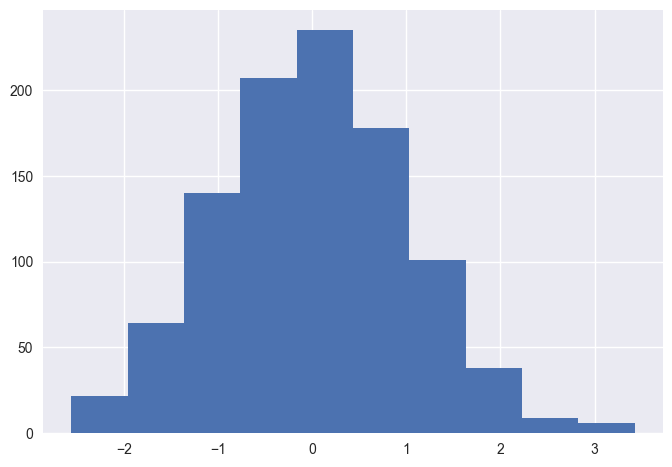

In [2]:
plt.hist(data);

The ``hist()`` function has many options to tune both the calculation and the display; 
here's an example of a more customized histogram:

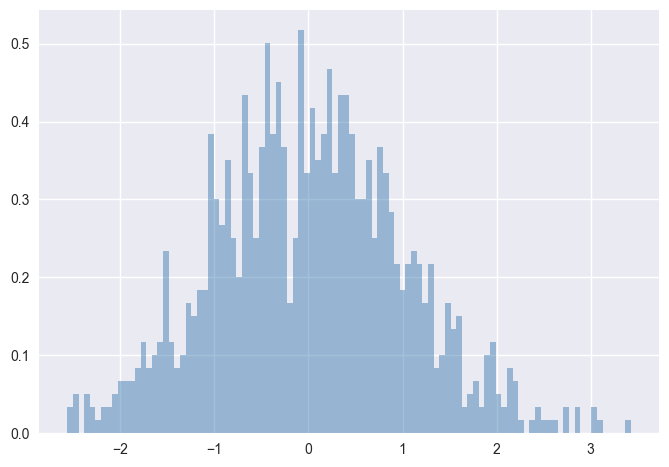

In [ ]:
plt.hist(data, bins=100, density=True, alpha=0.5, #alpha는 투명도,bins = 100개 구간으로 
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

The ``plt.hist`` docstring has more information on other customization options available.
I find this combination of ``histtype='stepfilled'`` along with some transparency ``alpha`` to be very useful when comparing histograms of several distributions:

kwargs = {
    'histtype': 'stepfilled',
    'alpha': 0.3,
    'density': True,
    'bins': 40
}


## plt.hist(x1, **kwargs) 적용후
plt.hist(x1, histtype='stepfilled', alpha=0.3, density=True, bins=40)


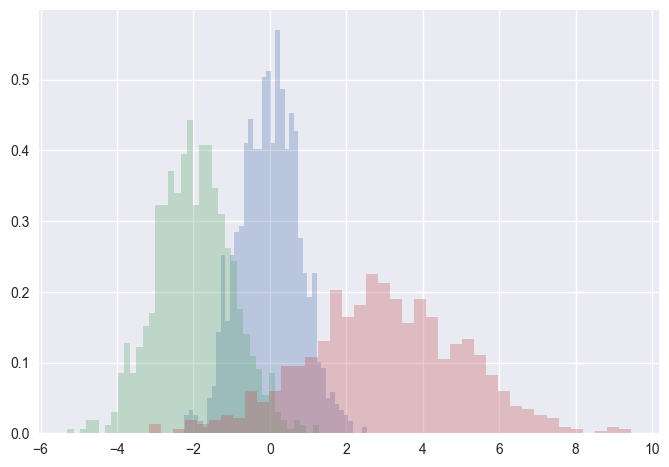

In [2]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)
# dict()는 파이썬 내장 함수로, **딕셔너리(dictionary)**를 생성하는 함수

plt.hist(x1, **kwargs) # **는 딕셔너리를 풀어서 함수에 각 키=값 형태의 인자로 전달해주는 파이썬 문법
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the ``np.histogram()`` function is available:

In [3]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)
print(bin_edges)

[ 16 178 471 285  50]
[-3.3680442  -2.11434582 -0.86064743  0.39305095  1.64674934  2.90044773]


## Two-Dimensional Histograms and Binnings

Just as we create histograms in one dimension by dividing the number-line into bins, we can also create histograms in two-dimensions by dividing points among two-dimensional bins.
We'll take a brief look at several ways to do this here.
We'll start by defining some data—an ``x`` and ``y`` array drawn from a multivariate Gaussian distribution:

In [15]:
mean = [0, 0] #  다변량 x1,x2의 평균 
cov = [[1, 0.3], [0.3, 1]] # 공분산 행렬 > (x1,x1), (x2, x2)의 분산
# (x1,x2), (x2, x1) > x1,x2가 상관관계 
x, y = np.random.multivariate_normal(mean, cov, 10000).T

공분산 행렬로 생성한 다변량 정규 분포는

- 타원 모양 분포를 만들며

- x₁과 x₂는 서로 강하게 같은 방향으로 움직이는 경향.
- 타원의 기울기가 생기고, 축이 회전한 모양.

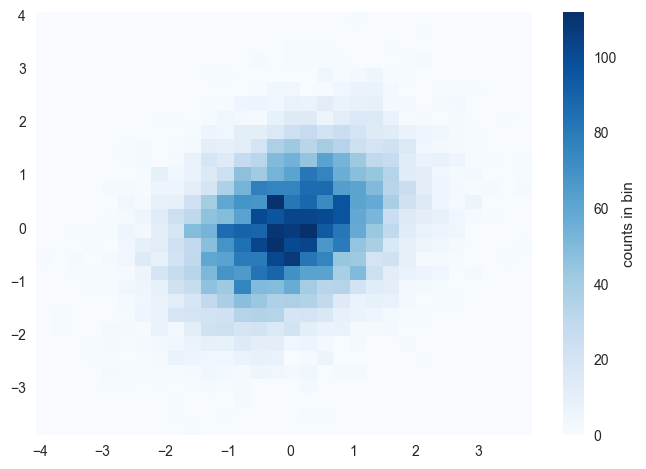

In [16]:
plt.hist2d(x,y,bins=30,cmap='Blues')
cb=plt.colorbar()
cb.set_label("counts in bin")

다변량 정규 분포의 **공분산 행렬(covariance matrix)**를 설정합니다.
공분산 행렬은 2차원 데이터에서 각 변수의 분산과 두 변수 간의 상관관계를 나타냅니다
시그마(x1,x1)**2 = 1, 시그마(x2,x2)**2 = 2, Cov(x1,x2) = 1, Cov(x2,x1) = 1

In [31]:
counts, xedges, yedges = np.histogram2d(x,y,bins=30)
print(counts)

[[  0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   1.   1.
    0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   2.   0.   3.
    1.   0.   0.   1.   0.   0.   0.   2.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0.   2.   1.   3.   2.   4.   2.
    5.   5.   0.   0.   1.   1.   1.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   2.   0.   1.   1.   6.   2.
    2.   3.   2.   1.   4.   0.   1.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   1.   0.   0.   2.   4.   3.   4.   4.   1.
    4.  11.   4.   5.   4.   1.   2.   0.   1.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   2.   0.   0.   1.   3.   4.   3.  11.  12.   8.   7.
    9.  10.   5.  11.   2.   4.   3.   1.   1.   1.   0.   1.   0.   0.
    0.   0.]
 [  0.   0.   0.   1.   0.   0.   1.   4.   2.   7.  10.  

### ``plt.hist2d``: Two-dimensional histogram

One straightforward way to plot a two-dimensional histogram is to use Matplotlib's ``plt.hist2d`` function:

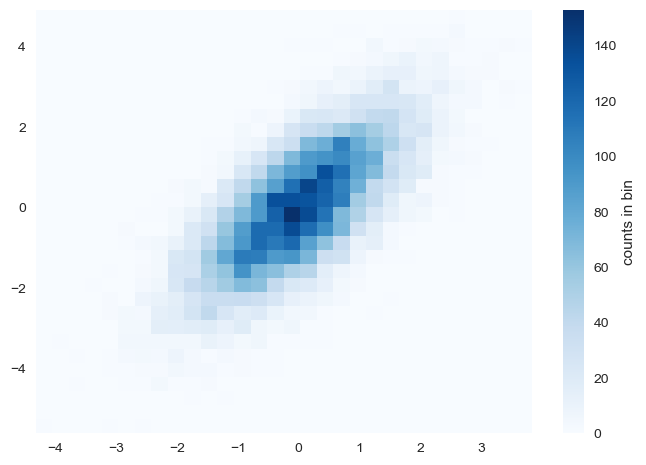

In [10]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

Just as with ``plt.hist``, ``plt.hist2d`` has a number of extra options to fine-tune the plot and the binning, which are nicely outlined in the function docstring.
Further, just as ``plt.hist`` has a counterpart in ``np.histogram``, ``plt.hist2d`` has a counterpart in ``np.histogram2d``, which can be used as follows:

In [9]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

For the generalization of this histogram binning in dimensions higher than two, see the ``np.histogramdd`` function.

### ``plt.hexbin``: Hexagonal binnings

The two-dimensional histogram creates a tesselation of squares across the axes.
Another natural shape for such a tesselation is the regular hexagon.
For this purpose, Matplotlib provides the ``plt.hexbin`` routine, which will represents a two-dimensional dataset binned within a grid of hexagons:

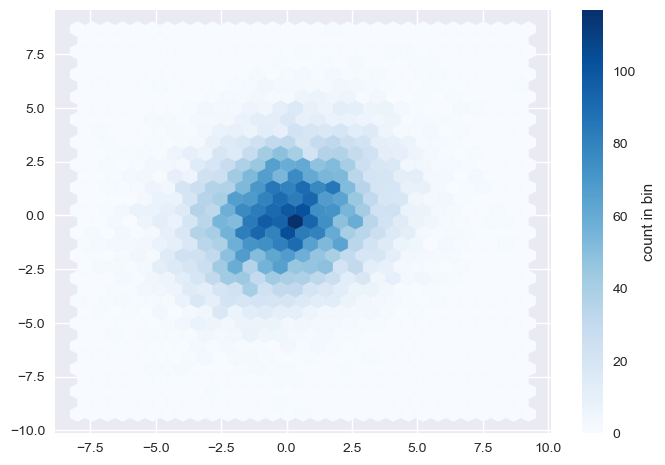

In [33]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

``plt.hexbin`` has a number of interesting options, including the ability to specify weights for each point, and to change the output in each bin to any NumPy aggregate (mean of weights, standard deviation of weights, etc.).

### Kernel density estimation

Another common method of evaluating densities in multiple dimensions is *kernel density estimation* (KDE).
This will be discussed more fully in [In-Depth: Kernel Density Estimation](05.13-Kernel-Density-Estimation.ipynb), but for now we'll simply mention that KDE can be thought of as a way to "smear out" the points in space and add up the result to obtain a smooth function.
One extremely quick and simple KDE implementation exists in the ``scipy.stats`` package.
Here is a quick example of using the KDE on this data:

구글링: Kernel Density Estimation(커널밀도추정)에 대한 이해, 기계학습, 15.2.27, https://darkpgmr.tistory.com/147



- 커널 밀도 추정(KDE, Kernel Density Estimation)은 히스토그램보다 부드럽게 데이터의 분포(확률 밀도 함수)를 추정하는 방법

히스토그램은?

- 막대 그래프로 구간별로 데이터 수를 세는 것

- 단점: 구간 너비(bin size)와 시작 위치에 따라 모양이 확 달라짐

KDE는?

- 각 데이터마다 작은 종 모양을 그림

- 이 종들을 겹쳐서 평균내듯이 더함

- 결과: 매끄럽고 자연스러운 곡선

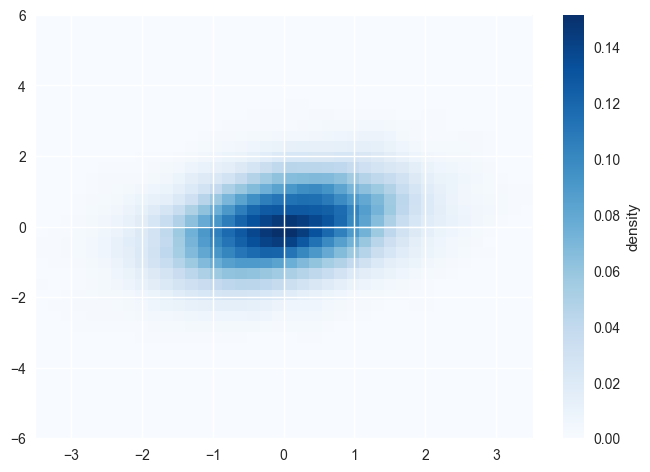

In [17]:
from scipy.stats import gaussian_kde

# 배열 크기 맞추기 [Ndim, Nsamples]
data = np.vstack([x, y]) # 두 배열을 아래위로 쌓아 2행 > (2,100)
kde = gaussian_kde(data) # gaussian_kde는 scipy.stats의 클래스
# data를 바탕으로 2D 확률 밀도 함수(즉, KDE)를 학습 > 
# "어떤 (x, y) 위치에 점이 얼마나 자주 등장하겠는가?"
#  확률 분포 함수를 만든다

# 정규 그리드 평가
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
# 주어진 위치에서 추정된 확률 밀도

# 결과를 이미지로 그리기
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

KDE has a smoothing length that effectively slides the knob between detail and smoothness (one example of the ubiquitous bias–variance trade-off).
The literature on choosing an appropriate smoothing length is vast: ``gaussian_kde`` uses a rule-of-thumb to attempt to find a nearly optimal smoothing length for the input data.

Other KDE implementations are available within the SciPy ecosystem, each with its own strengths and weaknesses; see, for example, ``sklearn.neighbors.KernelDensity`` and ``statsmodels.nonparametric.kernel_density.KDEMultivariate``.
For visualizations based on KDE, using Matplotlib tends to be overly verbose.
The Seaborn library, discussed in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb), provides a much more terse API for creating KDE-based visualizations.

<!--NAVIGATION-->
< [Density and Contour Plots](04.04-Density-and-Contour-Plots.ipynb) | [Contents](Index.ipynb) | [Customizing Plot Legends](04.06-Customizing-Legends.ipynb) >